In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('insurance - insurance.csv')
df = df.drop_duplicates()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## Null Hypothesis
    - There is no difference between smokers and non-smokers regarding the insurance charges. 
## Alternative Hypothesis
    - There is a difference between smokers and non-smokers regarding the insurance charges. 
    
## Data Type
    - Numeric
    
## Samples 
    - 2 samples
    
## Test
    - 2 Sample T-Test
    
## Assumptions
    - No significant outliers
    - Normality
    - Equal Variance

In [3]:
# seperate smokers from non-smokers
df_smoker = df[df['smoker']=='yes']
df_nonsmoker = df[df['smoker']=='no']

In [4]:
# seperate smoker charges from non-smoker charges
smoker_charges = df_smoker['charges']
nonsmoker_charges = df_nonsmoker['charges']

print("charges for smokers\n", smoker_charges)
print("charges for nonsmokers\n", nonsmoker_charges)

charges for smokers
 0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64
charges for nonsmokers
 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1063, dtype: float64


In [5]:
# Check for outliers in smokers charges
smoker_zscores= stats.zscore(smoker_charges)
smoker_outliers = abs(smoker_zscores)>3
print(np.sum(smoker_outliers))

0


In [6]:
# Check for outliers in nonsmokers charges
non_zscores= stats.zscore(nonsmoker_charges)
non_outliers = abs(non_zscores)>3
print(np.sum(non_outliers))

24


In [7]:
# remove outliers from nonsmoker charges
print(len(nonsmoker_charges))
nonsmoker_charges = nonsmoker_charges[non_outliers == False] 
print(len(nonsmoker_charges))

1063
1039


In [8]:
# check for normality
result = stats.normaltest(smoker_charges)
result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [9]:
# check for normality
result = stats.normaltest(nonsmoker_charges)
result

NormaltestResult(statistic=163.70821423990097, pvalue=2.8262654970074626e-36)

    - because we have grater than 15 samples, we can ignore the requirment for normal distrabition

In [10]:
# levenes test
result = stats.levene(smoker_charges, nonsmoker_charges)
result

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

In [11]:
result = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var=False)
result

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

    - our P-Value is significant, therfore we can reject our null hypothesis. 
    - we have support for the alternative hypothesis; there is a difference between smokers and non-smokers regarding the insurance charges. 

Mean smoker charges :  32050.23183153284
Mean non-smoker charges 7945.9246538585185


Text(0.5, 1.0, 'Insurance charges for smokers and non-smokers')

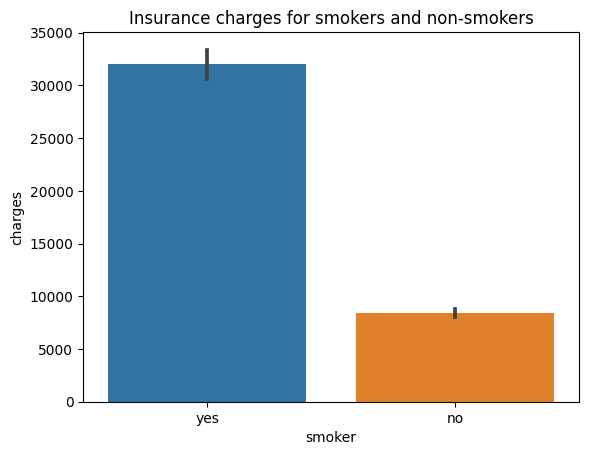

In [12]:
ax = sns.barplot(data=df, x='smoker', y='charges')
print("Mean smoker charges : ", smoker_charges.mean())
print("Mean non-smoker charges", nonsmoker_charges.mean())
ax.set_title('Insurance charges for smokers and non-smokers')


# Q2. Are men more likely to smoke than women?


## Null Hypothesis
    - There is no difference in the likelihood of smoking amongst men and women. 
## Alternative Hypothesis
    - There is a difference between men being are more likely to smoke than women.
    
## Data Type
    - categorical
    
## Samples 
    - 2 samples
    
## Test
    - chi-square
    
## Assumptions
    - There are two categorical variables (ordinal or nominal)
    - The outcomes are independent



In [13]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [14]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

In [15]:
# What was our p-value?
print(p)
p<.05

0.0062765550120107375


True

- Our p-value is smaller than .05, according to the chart we reject the null hypothesis.
- This means that here is a difference between men being are more likely to smoke than women. 

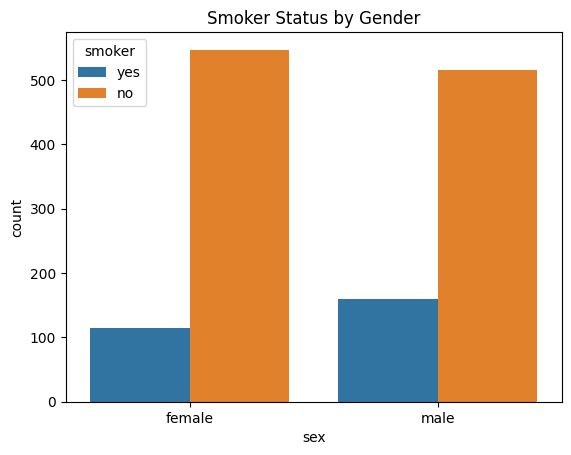

In [16]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Smoker Status by Gender");

# Q3. Do different regions have different charges, on average?


## Null Hypothesis
    - There is no difference in the average charges across regions.
## Alternative Hypothesis
    - There is a difference in the average charges across regions.
    
## Data Type
    - numerical
    
## Samples 
    - 2+
    
## Test
    - ANOVA
    
## Assumptions
    - No significant outliers
    - Equal variance
    - Normality


In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [18]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [19]:
for region, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    print(f"{outliers.sum()} Outliers were removed from the {region} group.")
    groups[region] = data.loc[~outliers]

8 Outliers were removed from the southwest group.
2 Outliers were removed from the southeast group.
7 Outliers were removed from the northwest group.
4 Outliers were removed from the northeast group.


In [20]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}

In [21]:
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,317.0,3.547435e-19,84.965784
northeast,320.0,3.557877e-17,75.749565


In [22]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,317.0,3.547435e-19,84.965784,True
northeast,320.0,3.557877e-17,75.749565,True


In [23]:
#testing for equal variance
result = stats.levene(*groups.values())
result

LeveneResult(statistic=9.515214992781331, pvalue=3.218183807441283e-06)

p-value > 0.05 (alpha hypothesis)
- This means we fail to reject the null which is that there is no difference in the average charges across regions.

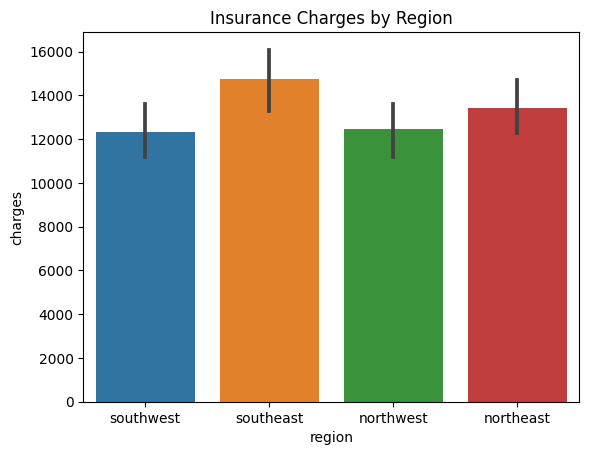

In [24]:
sns.barplot(data=df, x='region',y='charges')
plt.title('Insurance Charges by Region');